In [ ]:
import tensorflow as tf

In [ ]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from PIL import Image
#PIL is a package and Image is its module
from skimage.io import imread
#Scikit-image, or skimage, is an open source Python package designed for image preprocessing.
#First, we import the io module of skimage ( skimage.io ) so that we can read and write images.
#Then, we use the skimage. io. imread() function to read a JPEG image
#imshow function here to view the image in the notebook itself
#What if you want to load an image from your machine instead of the ones provided in the package?
#For this, we can use the imread function from skimage.
from skimage.transform import rescale, resize
#Difference between rescale and resize
import os
#What is os module
#The OS module in python provides functions for interacting with the operating system. OS, comes under Python’s standard utility modules. 
#This module provides a portable way of using operating system dependent functionality. 
#The *os* and *os.path* modules include many functions to interact with the file system.
import glob
#What is glob module
#In Python, the glob module is used to retrieve files/pathnames matching a specified pattern. 
#The pattern rules of glob follow standard Unix path expansion rules. 
#It is also predicted that according to benchmarks it is faster than other methods to match pathnames in directories. 
#With glob, we can also use wildcards ("*, ?, [ranges]) apart from exact string search to make path retrieval more simple and convenient.
import string
#What is string module
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras import applications
#What is above line of code
import keras
#Keras is a powerful and easy-to-use free open source Python library for developing and evaluating deep learning models.
#Keras is a deep learning API written in Python, running on top of the machine learning platform TensorFlow
from tensorflow.keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix
import seaborn as sn
import shutil
#The shutil module helps you automate copying files and directories. 
#This saves the steps of opening, reading, writing and closing files when there is no actual processing. 
#It comes under Python’s standard utility modules. This module helps in automating process of copying and removal of files and directories.
import random
#Using random module we can generate random numbers and data
import cv2
#OpenCV is the huge open-source library for computer vision, machine learning, and image processing
#and now it plays a major role in real-time operation which is very important in today’s systems. 
#By using it, one can process images and videos to identify objects, faces, or even the handwriting of a human.
#OpenCV releases two types of Python interfaces, cv and cv2 . latest one is cv2 . This will give you an idea whether you have installed opencv correctly.

PIL- 
Python Imaging Library is a free and open-source additional library for the Python programming language that adds support for opening, manipulating, and saving many different image file formats.
Pillow library for python:
Pillow allows us to work with and manipulate images using python


In [ ]:
#Creation of a CNN . Sequential Model

model = Sequential()
#input_shape matches our input image
model.add(Conv2D(64, (3,3), input_shape=(224, 224, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(64))
model.add(Dense(4)) #data of four types
model.add(Activation('softmax'))

model.compile(loss= keras.losses.categorical_crossentropy, 
              optimizer= Adam(),metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 52, 52, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 26, 26, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 64)        3

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#Image augmentation is a technique of applying different transformations to original images which results in multiple transformed copies of the same image. 
#Each copy, however, is different from the other in certain aspects depending on the augmentation techniques you apply like shifting, rotating, flipping, etc.
#Keras ImageDataGenerator class provides a quick and easy way to augment your images. 
#It provides a host of different augmentation techniques like standardization, rotation, shifts, flips, brightness change, and many more.

train_datagen = ImageDataGenerator(
        
        rotation_range=90, 
        zoom_range = 0.1, 
        width_shift_range=0.1,  
        height_shift_range=0.1,  
        horizontal_flip=True,  
        vertical_flip=True,
        rescale = 1./255,
        validation_split = 0.2
        )
#Properties of ImageDataGenerator

In [ ]:
test_datagen = ImageDataGenerator(rescale = 1./255 )
#The ImageDataGenerator class can be used to rescale pixel values from the range of 0-255 to the range 0-1 preferred for neural network models.
#Scaling data to the range of 0-1 is traditionally referred to as normalization.
#What does rescale 1/255 in ImageDataGenerator do?
#Rescale 1./255 is to transform every pixel value from range [0,255] -> [0,1]. 
#And the benefits are: Treat all images in the same manner: some images are high pixel range, some are low pixel range.
#Scaling every images to the same range [0,1] will make images contributes more evenly to the total loss.



In [ ]:
# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

In [ ]:
train_path = '/content/drive/My Drive/dataset/training'
test_path = '/content/drive/My Drive/dataset/testing'

In [ ]:
 # Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory(train_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical',
                                            subset = 'training',
                                            shuffle = True)
#What is target_size and batch_size 

Found 4876 images belonging to 4 classes.


In [ ]:
val_set = train_datagen.flow_from_directory(train_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical',
                                            subset = 'validation',
                                            shuffle = True)

Found 1216 images belonging to 4 classes.


In [ ]:
test_set = test_datagen.flow_from_directory(test_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical',
                                            shuffle = True)

Found 1524 images belonging to 4 classes.


In [ ]:
history = model.fit(
  training_set,
  validation_data= val_set,
  epochs= 3,
  shuffle = True,
  steps_per_epoch=len(training_set),
  validation_steps=len(val_set)
  
)

Epoch 1/3
153/153 [==============================] - 2405s 16s/step - loss: 1.3703 - accuracy: 0.2984 - val_loss: 1.1594 - val_accuracy: 0.4416
Epoch 2/3
153/153 [==============================] - 546s 4s/step - loss: 1.1528 - accuracy: 0.4878 - val_loss: 0.9156 - val_accuracy: 0.6414
Epoch 3/3
153/153 [==============================] - 539s 4s/step - loss: 0.9938 - accuracy: 0.5718 - val_loss: 0.6355 - val_accuracy: 0.7574


In [ ]:
model.evaluate(test_set)

48/48 [==============================] - 339s 7s/step - loss: 0.7585 - accuracy: 0.7021


[0.7585200071334839, 0.7020997405052185]

In [ ]:
model.save('mech2.h5')

In [ ]:
#history.history

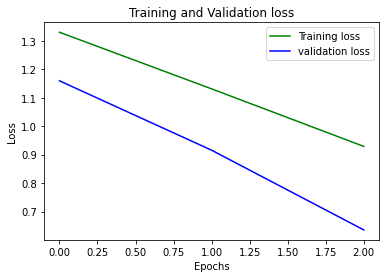

<Figure size 432x288 with 0 Axes>

In [ ]:
# Get training and test loss histories
loss_train = history.history['loss']
loss_val = history.history['val_loss']
#epochs = range(1,no_epochs+1)
plt.plot( loss_train, 'g', label='Training loss')
plt.plot( loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
plt.savefig('train-val loss')
#One of the default callbacks that is registered when training all deep learning models is the History callback. 
#It records training metrics for each epoch. 
#This includes the loss and the accuracy (for classification problems) as well as the loss and accuracy for the validation dataset, if one is set.




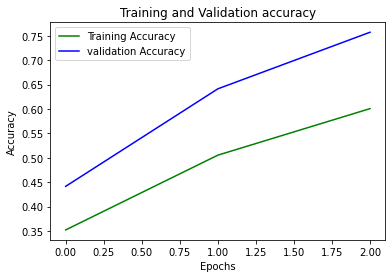

<Figure size 432x288 with 0 Axes>

In [ ]:
loss_train = history.history['accuracy']
loss_val = history.history['val_accuracy']
#epochs = range(1,no_epochs+1)
plt.plot( loss_train, 'g', label='Training Accuracy')
plt.plot( loss_val, 'b', label='validation Accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
plt.savefig('train-val-accuracy')

In [ ]:
#Prediction

In [ ]:
#Load the model 

from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np

#Loading our Model
model = load_model('./mech2.h5')

['/content/drive/My Drive/dataset/testing/nut', '/content/drive/My Drive/dataset/testing/bolt', '/content/drive/My Drive/dataset/testing/washer', '/content/drive/My Drive/dataset/testing/locatingpin']
/content/drive/My Drive/dataset/testing/bolt/MSB4-45_9.png


Text(0.5, 1.0, '/content/drive/My Drive/dataset/testing/bolt/MSB4-45_9.png')

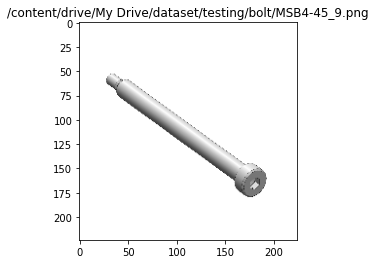

In [ ]:
import os 
import random 
import cv2
import matplotlib.pyplot as plt
import glob
%matplotlib inline 

test_path = '/content/drive/My Drive/dataset/testing/*'
list = glob.glob(test_path )
print(list)

path =  random.choice(list) 
pic = random.choice(glob.glob(path + '/*'))
print(pic)

pict =  cv2.imread(pic)
plt.imshow(pict)
plt.title(pic)

In [ ]:
img=image.load_img(pic,target_size=(224,224))
x=image.img_to_array(img)
x

array([[[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       ...,

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 2

In [ ]:
x=x/255
print(x)

[[[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 ...

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]]


In [ ]:
x.shape

(224, 224, 3)

In [ ]:
x=np.expand_dims(x,axis=0)
x.shape

(1, 224, 224, 3)

In [ ]:
model.predict(x)

array([[7.1674448e-01, 2.8084576e-01, 2.0010578e-03, 4.0872197e-04]],
      dtype=float32)

In [ ]:
a=np.argmax(model.predict(x))

In [ ]:
a

0

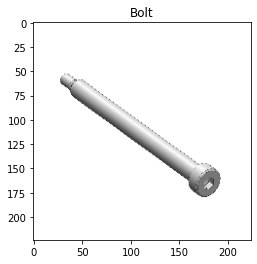

In [ ]:
if(a==0):
    plt.imshow(img)
    plt.title('Bolt')
elif(a == 1):
    plt.imshow(img)
    plt.title('Locating Pin')
    
elif(a==2):
    plt.imshow(img)
    plt.title('Nut')

elif(a==3):
    plt.imshow(img)
    plt.title('Washer')